In [2642]:
import proxynorm
import importlib
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt

In [2643]:
importlib.reload(proxynorm)

<module 'proxynorm' from 'd:\\Documents\\machinelearning\\ProxyNorm\\proxynorm\\__init__.py'>

In [2644]:
from proxynorm import ProxyNorm2d

In [2645]:
PATH = "demo.png"

In [2646]:
img = cv2.cvtColor(cv2.imread(PATH, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

In [2647]:
x = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0) / 255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


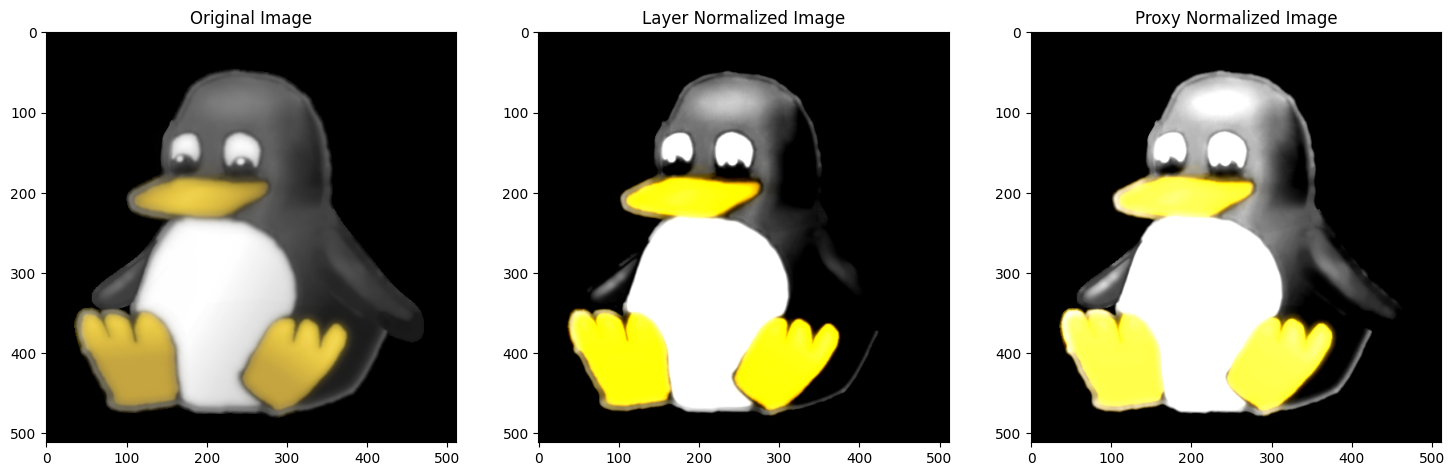

In [2648]:
def plot_image(subplot, title, image):
    plt.subplot(*subplot)
    plt.title(title)
    plt.imshow(image.squeeze().permute(1, 2, 0).detach().numpy())

plt.figure(figsize=(18, 6))

plot_image((1, 3, 1), "Original Image", x)
plot_image((1, 3, 2), "Layer Normalized Image", nn.LayerNorm(x.size()[1:])(x))
plot_image((1, 3, 3), "Proxy Normalized Image", ProxyNorm2d(3)(x))

plt.show()